In [1]:
import pandas as pd
web_dev = pd.read_csv("UdemyWebDevelopment.csv")
web_dev.head(5)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Unnamed: 11,Unnamed: 12,Is Paid,Total,Percent
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,NaN,NaN,Yes,1067.0,89%
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,NaN,NaN,No,133.0,11%
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z,NaN,NaN,NaN,NaN,NaN
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate Level,15.5 hours,2014-06-17T05:43:50Z,NaN,NaN,NaN,NaN,NaN
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner Level,5.5 hours,2015-10-17T04:52:25Z,NaN,NaN,NaN,NaN,NaN


# Why is dtype of "price" an object?

In [2]:
web_dev = web_dev.drop(["Unnamed: 11","Unnamed: 12","Is Paid","Total","Percent"], axis=1)
web_dev.info()
print(web_dev.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1200 non-null   int64 
 1   title                 1200 non-null   object
 2   url                   1200 non-null   object
 3   isPaid                1200 non-null   bool  
 4   price                 1200 non-null   object
 5   numSubscribers        1200 non-null   int64 
 6   numReviews            1200 non-null   int64 
 7   numPublishedLectures  1200 non-null   int64 
 8   instructionalLevel    1200 non-null   object
 9   contentInfo           1200 non-null   object
 10  publishedTime         1200 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 95.0+ KB
(1200, 11)


In [3]:
web_dev.price.value_counts().head()

20      187
Free    133
50      121
200     113
195      72
Name: price, dtype: int64

In [4]:
web_dev.price.replace("Free", 0, inplace=True)
web_dev.price = web_dev.price.astype(int)
web_dev.price.value_counts().head(5)

20     187
0      133
50     121
200    113
195     72
Name: price, dtype: int64

In [5]:
web_dev.instructionalLevel.value_counts()

All Levels            659
Beginner Level        391
Intermediate Level    135
Expert Level           15
Name: instructionalLevel, dtype: int64

In [6]:
web_dev = web_dev.rename(columns = {web_dev.columns[9]: "contentInfo_hours"})

pd.set_option("display.max_rows", None)
web_dev["contentInfo_hours"].value_counts().head(25)

1 hour        136
1.5 hours     124
2 hours       123
3 hours        82
3.5 hours      74
2.5 hours      71
4 hours        56
5 hours        41
4.5 hours      38
5.5 hours      34
6.5 hours      30
6 hours        26
7 hours        25
7.5 hours      20
8 hours        18
9 hours        18
8.5 hours      13
13 hours       11
11 hours       11
12.5 hours     11
10.5 hours     10
10 hours       10
34 mins         9
37 mins         9
12 hours        9
Name: contentInfo_hours, dtype: int64

Every class that is under one hour will be denoted as 0 (hours), as a few minutes difference in the length of the classes under and hour will not be significant to the analysis

After renaming the column, we'll first remove any row values with " mins". Since we know that only the row values that are floats instead of string objects are minutes, we'll isolate those row values to convert them to minutes. And then we can clean the rest of the row values because we know that those are hour values.

In [7]:
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].apply(lambda x: '0' if ' mins' in x else x)
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].replace(to_replace =[' hour$',' hours$'], value = "", regex = True)
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].astype(float)
web_dev["contentInfo_hours"].value_counts().head(25)

1.0     136
1.5     124
2.0     123
3.0      82
0.0      76
3.5      74
2.5      71
4.0      56
5.0      41
4.5      38
5.5      34
6.5      30
6.0      26
7.0      25
7.5      20
9.0      18
8.0      18
8.5      13
11.0     11
12.5     11
13.0     11
10.0     10
10.5     10
9.5       9
12.0      9
Name: contentInfo_hours, dtype: int64

In [8]:
# one final check for cleaning
web_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1200 non-null   int64  
 1   title                 1200 non-null   object 
 2   url                   1200 non-null   object 
 3   isPaid                1200 non-null   bool   
 4   price                 1200 non-null   int32  
 5   numSubscribers        1200 non-null   int64  
 6   numReviews            1200 non-null   int64  
 7   numPublishedLectures  1200 non-null   int64  
 8   instructionalLevel    1200 non-null   object 
 9   contentInfo_hours     1200 non-null   float64
 10  publishedTime         1200 non-null   object 
dtypes: bool(1), float64(1), int32(1), int64(4), object(4)
memory usage: 90.4+ KB


# Statistics and Visualization

In [9]:
web_dev.describe().round(2)

,id,price,numSubscribers,numReviews,numPublishedLectures,contentInfo_hours
count,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,706854.25,77.03,6650.48,358.35,52.82,5.56
std,328924.40,66.08,14613.65,1574.81,62.81,7.28
min,8324.00,0.00,19.00,0.00,5.00,0.00
25%,475711.50,20.00,1127.50,25.00,19.00,1.50
50%,738456.00,50.00,2416.50,65.00,32.00,3.00
75%,975271.50,115.00,6894.75,179.25,63.25,6.50
max,1277924.00,200.00,268923.00,27445.00,779.00,76.50


In [10]:
web_dev.corr(method='pearson').round(2)

,id,isPaid,price,numSubscribers,numReviews,numPublishedLectures,contentInfo_hours
id,1.00,0.04,0.13,-0.26,-0.09,-0.03,-0.05
isPaid,0.04,1.00,0.41,-0.27,-0.07,0.16,0.15
price,0.13,0.41,1.00,0.01,0.13,0.39,0.38
numSubscribers,-0.26,-0.27,0.01,1.00,0.64,0.13,0.15
numReviews,-0.09,-0.07,0.13,0.64,1.00,0.27,0.27
numPublishedLectures,-0.03,0.16,0.39,0.13,0.27,1.00,0.86
contentInfo_hours,-0.05,0.15,0.38,0.15,0.27,0.86,1.00


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8a1a6db20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8a1a83220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8a1a6d7c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1e8a1a838e0>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1e8a1a83c40>,
  <matplotlib.lines.Line2D at 0x1e8a1abe460>]}

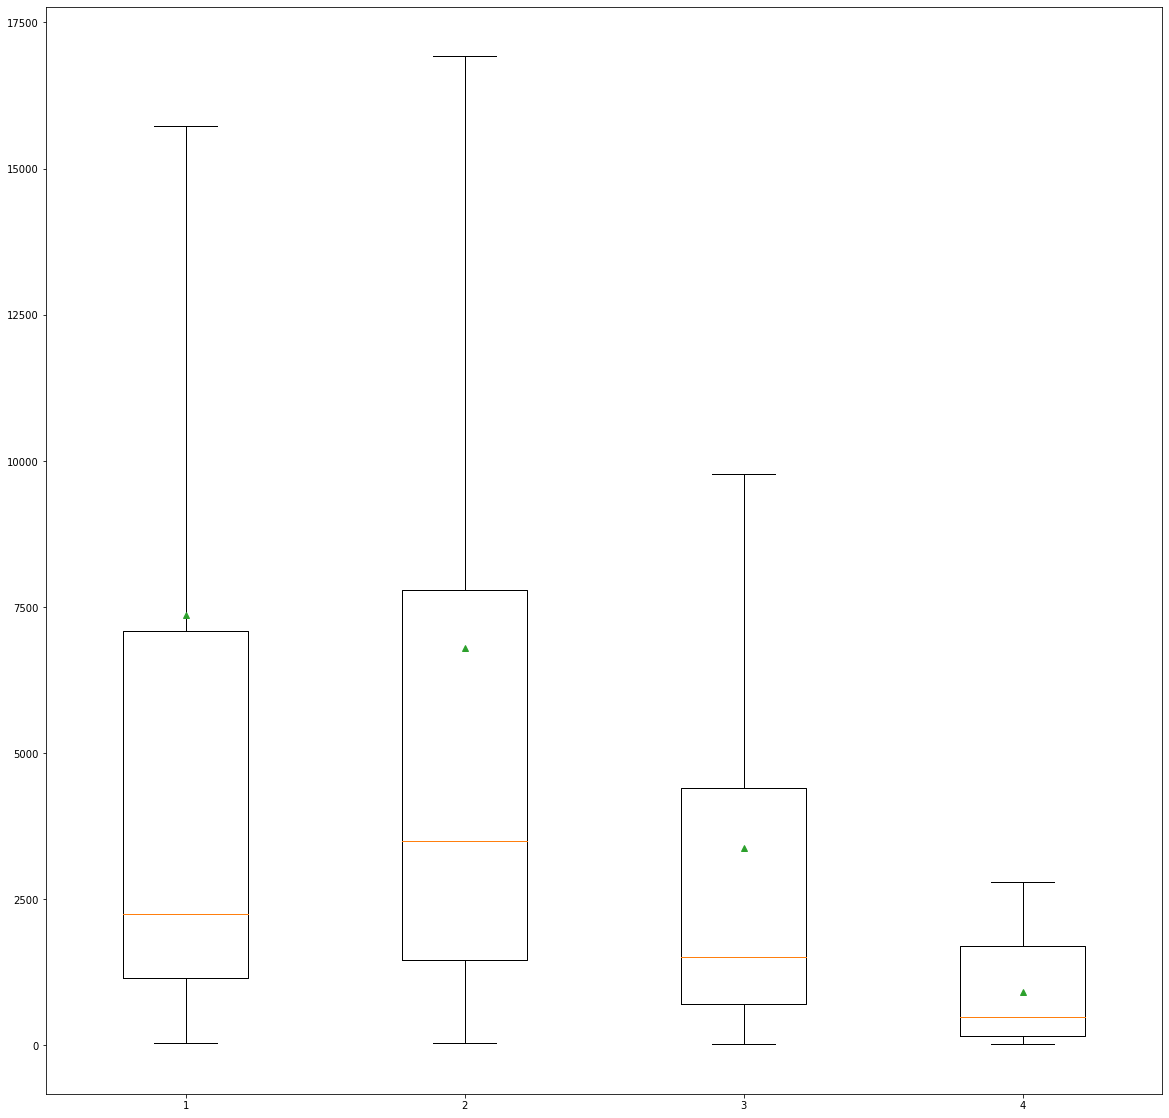

In [12]:
all_levels = web_dev[web_dev["instructionalLevel"]=="All Levels"]
beginner = web_dev[web_dev["instructionalLevel"]=="Beginner Level"]
intermediate = web_dev[web_dev["instructionalLevel"]=="Intermediate Level"]
expert = web_dev[web_dev["instructionalLevel"]=="Expert Level"]

plt.figure(figsize=(20,20))
plt.boxplot([all_levels["numSubscribers"],beginner["numSubscribers"],intermediate["numSubscribers"],expert["numSubscribers"]],showmeans=True,sym='')

In [13]:
import statsmodels.api as sm
regdata = web_dev[["price","contentInfo_hours"]]
regdata.describe().round(2)

,price,contentInfo_hours
count,1200.00,1200.00
mean,77.03,5.56
std,66.08,7.28
min,0.00,0.00
25%,20.00,1.50
50%,50.00,3.00
75%,115.00,6.50
max,200.00,76.50


In [14]:
# creating a linear regression which predicts price based on course length in hours
y = regdata["price"]
x1 = regdata["contentInfo_hours"]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     200.3
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           3.62e-42
Time:                        18:53:57   Log-Likelihood:                -6638.5
No. Observations:                1200   AIC:                         1.328e+04
Df Residuals:                    1198   BIC:                         1.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                57.9377      2.223     26.066      0.000      53.577      62.299
contentInfo_hours     3.4368      0.243     14.154      0.000       2.960       3.913
==============================================================================
Omnibus:                       96.132   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.606
Skew:                           0.759   Prob(JB):                     2.90e-26
Kurtosis:                       2.784   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

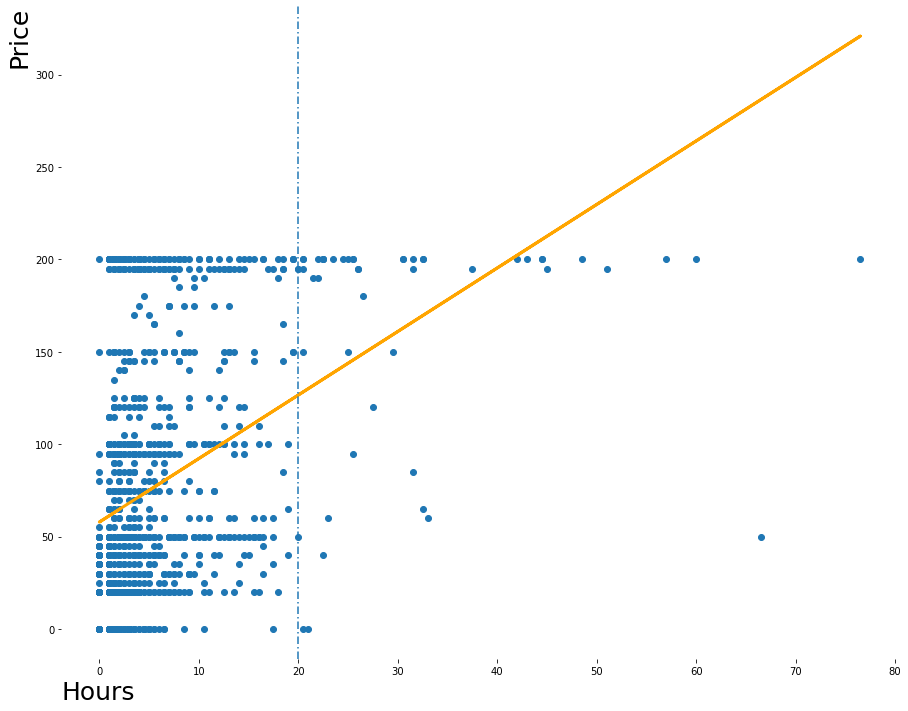

In [36]:
plt.figure(figsize=(15,12))
plt.scatter(x1,y)
yhat = 3.4368*x1 + 57.9377
plt.plot(x1,yhat,lw=3,c='orange',label='regression line')
plt.axvline(x=20,dashes=(5, 2, 1, 2))
plt.xlabel("Hours",fontsize=25,loc='left')
plt.ylabel("Price",fontsize=25,loc='top')
sns.despine(left=True,bottom=True)

Basically, courses that are under 20 hours can be set at any price point. Some courses that are under 5 hours long can cost over $100. There is not enough information to determine what influences prices.

# 20% of courses account for 80% of subscribers?
Histogram: the number of classes that has under 25,000 students

<AxesSubplot:xlabel='numSubscribers', ylabel='Count'>

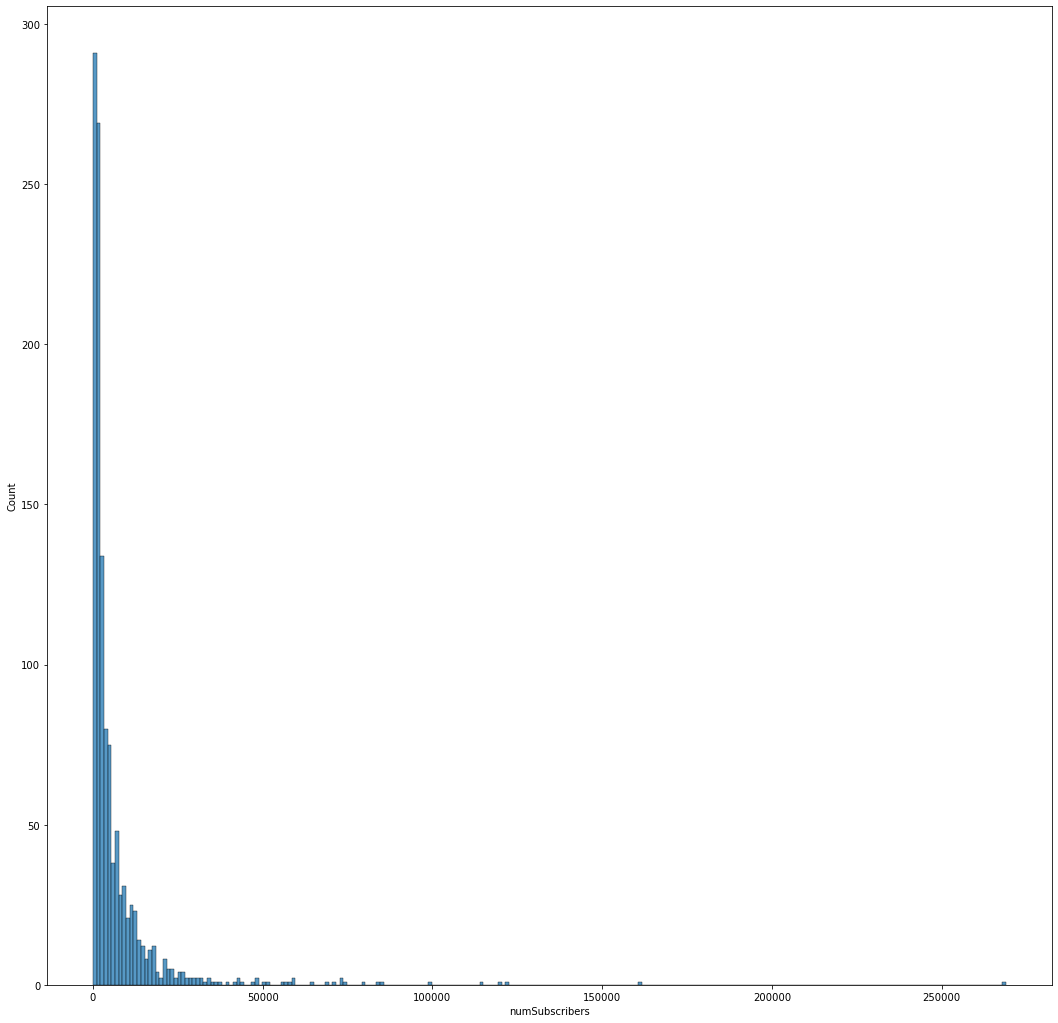

In [16]:
plt.figure(figsize=(18,18))
df_sorted= web_dev.sort_values('numSubscribers',ascending=False)
sns.histplot(df_sorted.numSubscribers)

From the graph, we can estimate that the cutoff point for where the majority of courses lie is at 25,000 subscribers

In [17]:
# new dataframe for courses having under 25,000 subscribers
under25k = web_dev[web_dev.numSubscribers < 25000]

# percentage of number of courses that have under 25,000 subscribers
per_under25k = round((under25k.shape[0] / web_dev.shape[0])*100, 1)
per_under25k

95.6

In [18]:
# percent of total courses that have over 25,000 subscribers
per_over25k = round(100 - per_under25k, 1)
per_over25k

4.4

In [19]:
under25k.count()

id                      1147
title                   1147
url                     1147
isPaid                  1147
price                   1147
numSubscribers          1147
numReviews              1147
numPublishedLectures    1147
instructionalLevel      1147
contentInfo_hours       1147
publishedTime           1147
dtype: int64

In [20]:
web_dev.count()

id                      1200
title                   1200
url                     1200
isPaid                  1200
price                   1200
numSubscribers          1200
numReviews              1200
numPublishedLectures    1200
instructionalLevel      1200
contentInfo_hours       1200
publishedTime           1200
dtype: int64

In [21]:
# total sum number of all subscribers
web_dev.numSubscribers.sum()

7980572

In [22]:
# sum of numSubscribers for courses having under 25,000 subscribers
under25k.numSubscribers.sum()

4984164

In [23]:
# sum of numSubscribers for courses having over 25,000 subscribers
sum_over25k = web_dev.numSubscribers.sum() - under25k.numSubscribers.sum()
sum_over25k

2996408

In [24]:
# percentage of total students the top performing 4% of classes holds
top_percentile = ((sum_over25k / web_dev.numSubscribers.sum())*100).round(1)
top_percentile

37.5

In [25]:
# percentage of total students the bottom performing 96% of classes holds
bottom_percentile = ((under25k.numSubscribers.sum() / web_dev.numSubscribers.sum())*100).round(1)
bottom_percentile

62.5

# Possible To Do A Waterfall Chart Here

In [26]:
!pip install waterfallcharts

In [27]:
# data = {'Percentile': ['Top Percentile (Over 25K Subscribers)','Bottom Percentile (Under 25K Subscribers)','All'],
#         'Sum Number of Courses Held': [53,1147,1200],
#         'Percentage of All Courses Held': [4,96,100],
#         'Sum Number of Subscribers': [2996408,4984164,7980572],
#         'Percentage of Subscribers': [38,62,100]}
# stats = pd.DataFrame(data, columns=['Percentile','Sum Number of Courses Held','Percentage of All Courses Held','Sum Number of Subscribers','Percentage of Subscribers'])
# stats

In [28]:
data = {'Percentile': ['Courses with Under 25K Subs','Courses with Over 25K Subs'],
        'Sum Number of Courses Held': [1147,53],
        'Percentage of All Courses Held': [96,4],
        'Sum Number of Subscribers': [4984164,2996408],
        'Percentage of Subscribers': [62,38]}
stats = pd.DataFrame(data, columns=['Percentile','Sum Number of Courses Held','Percentage of All Courses Held','Sum Number of Subscribers','Percentage of Subscribers'])
stats

,Percentile,Sum Number of Courses Held,Percentage of All Courses Held,Sum Number of Subscribers,Percentage of Subscribers
0,Courses with Under 25K Subs,1147,96,4984164,62
1,Courses with Over 25K Subs,53,4,2996408,38


Text(0.0, 1.0, 'Count of Courses')

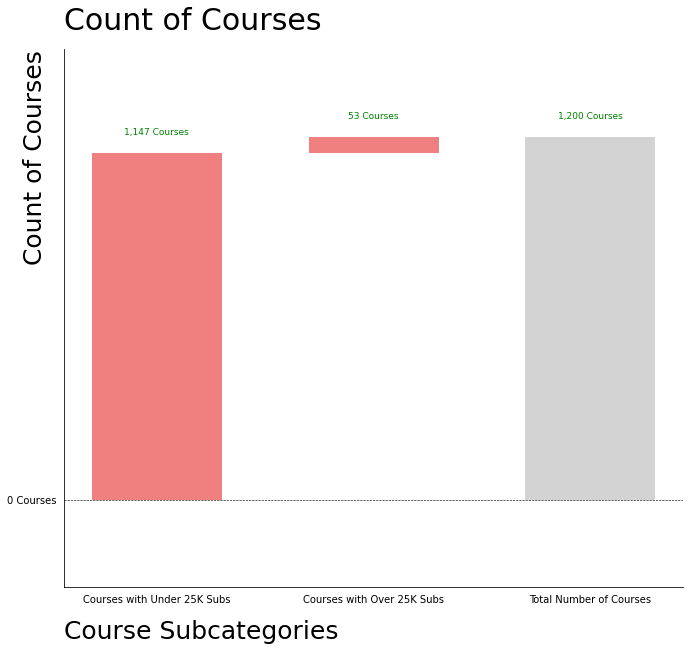

In [44]:
import waterfall_chart

plt.rcParams["figure.figsize"] = (10,8)
waterfall_chart.plot(stats.Percentile,stats["Sum Number of Courses Held"],
        rotation_value=0,net_label="Total Number of Courses",formatting="{:,.0f} Courses",
        blue_color='lightgrey',green_color='lightcoral')

sns.despine()
plt.tick_params(left=False,bottom=False)
plt.yticks([0])
plt.xlabel("Course Subcategories",loc="left",fontsize=25,labelpad=15)
plt.ylabel("Count of Courses",loc="top",fontsize=25,labelpad=-40)
plt.title("Count of Courses",loc='left',fontsize=30,pad=20)

Text(0.0, 1.0, 'Count of Subscribers')

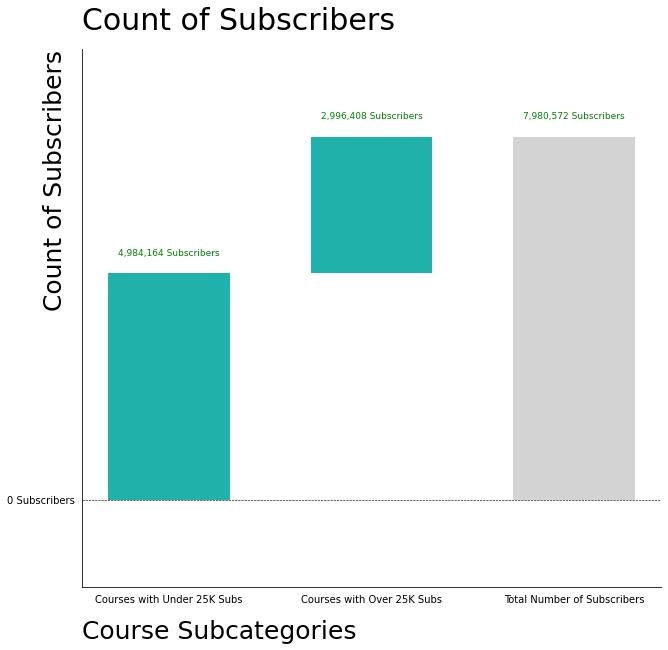

In [31]:
waterfall_chart.plot(stats.Percentile,stats["Sum Number of Subscribers"],
        rotation_value=0,net_label="Total Number of Subscribers",formatting="{:,.0f} Subscribers",
        blue_color='lightgrey',green_color='lightseagreen')

sns.despine()
plt.tick_params(left=False,bottom=False)
plt.yticks([0])
plt.xlabel("Course Subcategories",loc="left",fontsize=25,labelpad=15)
plt.ylabel("Count of Subscribers",loc="top",fontsize=25,labelpad=-60)
plt.title("Count of Subscribers",loc='left',fontsize=30,pad=20)

Text(0.0, 1.0, 'Discrepancy Between Courses Having Over or Under 25,000 Subscribers')

<Figure size 1080x864 with 0 Axes>

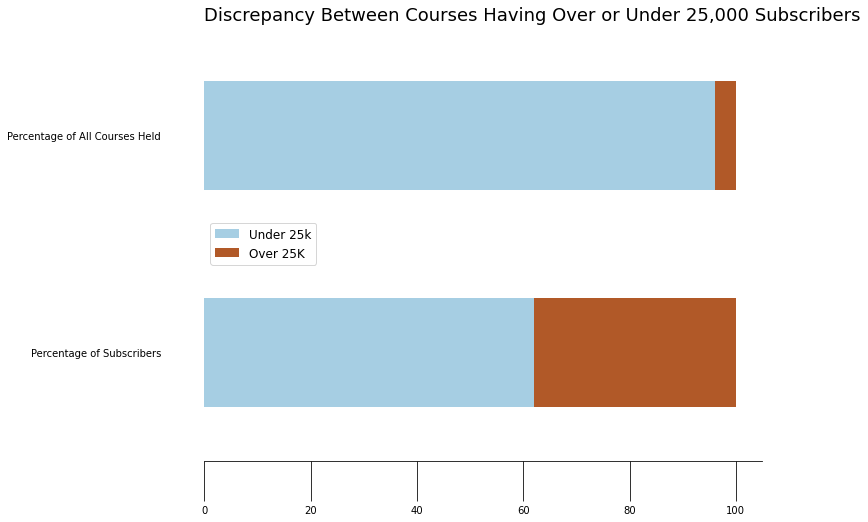

In [61]:
# figure out how to mark the segments
# add % sign to x-tick labels
from matplotlib import cm
cmap = cm.get_cmap('Paired')

plt.figure(figsize=(15,12))
stats[['Percentage of Subscribers','Percentage of All Courses Held']].T.plot(kind='barh', stacked=True,cmap=cmap)
plt.legend(['Under 25k','Over 25K'],loc='center left',fontsize=12)
sns.despine(left=True)
plt.tick_params(left=False,length=40)
plt.title("Discrepancy Between Courses Having Over or Under 25,000 Subscribers",loc='left',fontsize=18,fontweight=50)

# Summary of What the Viz is Supposed to Say

Make a storyboard with the data I got.

1. Is there some kind of conflict or stakes that can be brought up with the data? What's in it for the reader to get invested in this project?

# Visualizing Descriptive Insights
From this histogram, it looks like a whopping 96% of courses on Udemy has under 25,000 subscribers; this is 62% of all subscribers. Meaning that the top 4 percentile of classes possess holds 38% of all subscribers

In [33]:
# plt.figure(figsize=(18,18))
# # plt.bar(x=["Courses under 25,000 Subscribers","Courses Over 25,000 Subscribers"],y=[top_percentile,bottom_percentile],height=1)
# per = pd.Series[top_percentile,bottom_percentile]
# lab = pd.Series["Over","Under"]
# sns.factorplot(x=lab,y=per)

# What Statistical Analysis Can I Do with Log?
Decide whether this part will even be necessary.

<AxesSubplot:xlabel='numSubscribers', ylabel='Count'>

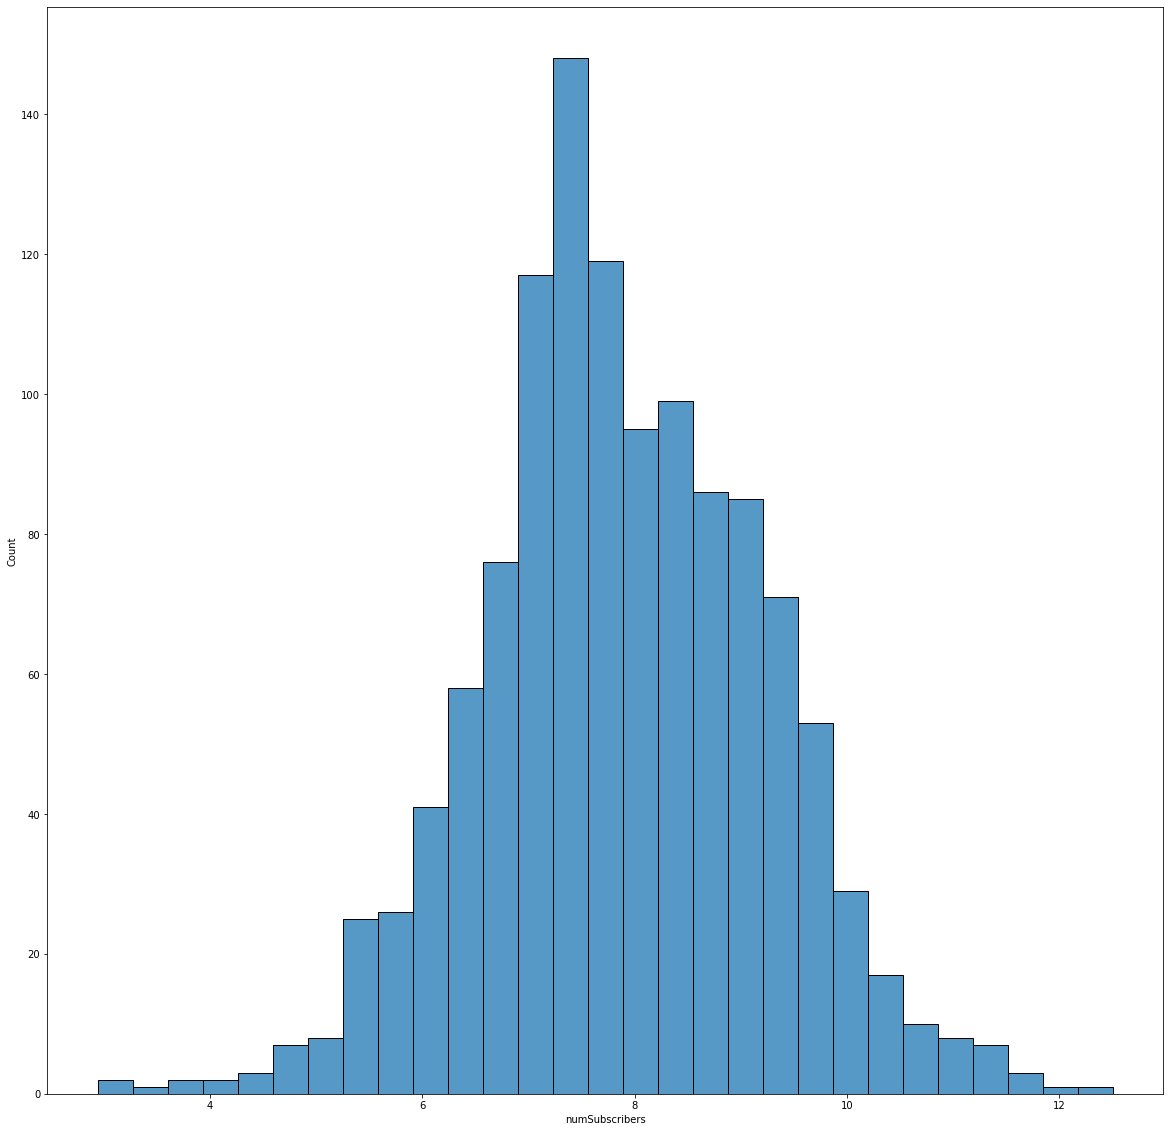

In [34]:
import numpy as np
numlog = np.log(web_dev.numSubscribers)

plt.figure(figsize=(20,20))
sns.histplot(numlog)